In [1]:
import pandas as pd
import numpy as np
import timeit
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *

np.random.seed(42)
num_average_time = 100 

C:\Users\Harshil Shah\AppData\Local\Temp\ipykernel_13324\3783916370.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Run the functions, Learn the DTs and Show the results/plots
def generate_data(N, M):
    X = np.random.randint(2, size=(N, M))
    y = np.random.randint(2, size=N)
    X = pd.DataFrame(X)
    y = pd.Series(y)
    return X, y

def measure_training_time(model, X, y):
    training_time = timeit.timeit(lambda: model.fit(X, y), number=1)
    return training_time

def measure_prediction_time(model, X):
    prediction_time = timeit.timeit(lambda: model.predict(X), number=1)
    return prediction_time


In [13]:
Ns = [100, 1000]
Ms = [10, 100, 500]
results = {}

In [17]:
for N in Ns:
    training_times = []
    prediction_times = []
    for M in Ms:
        training_time_sum = 0
        prediction_time_sum = 0
        for i in range(3):
            tree = DecisionTree(criterion="information_gain")
            X, y = generate_data(N, M)
            X_train = X.iloc[:int(0.7 * N)]
            y_train = y.iloc[:int(0.7 * N)]
            X_test = X.iloc[int(0.7 * N):]
            y_test = y.iloc[int(0.7 * N):]
            training_time_sum += measure_training_time(tree, X_train, y_train)
            prediction_time_sum += measure_prediction_time(tree, X_test)
        training_times.append(training_time_sum/3)
        prediction_times.append(prediction_time_sum/3)
        print("Done ", N, " ", M )
    results[N] = (training_times, prediction_times)

Done  100   10
Done  100   100
Done  100   500
Done  1000   10
Done  1000   100
Done  1000   500


In [18]:
print(results)

{100: ([0.23474486668904623, 1.1936232999432832, 4.347304733314862], [0.002355733265479406, 0.0019557999912649393, 0.0017345333471894264]), 1000: ([0.293586566656207, 2.609985900033886, 22.125575266623247], [0.022436000018691022, 0.02272813340338568, 0.024366666640465457])}


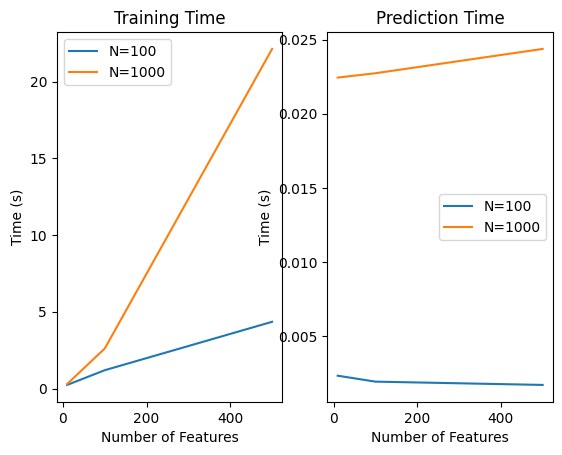

In [19]:
fig, ax = plt.subplots(1, 2)
ax[0].set_title("Training Time")
ax[1].set_title("Prediction Time")
ax[0].set_xlabel("Number of Features")
ax[1].set_xlabel("Number of Features")
ax[0].set_ylabel("Time (s)")
ax[1].set_ylabel("Time (s)")
ax[0].plot(Ms, results[100][0], label="N=100")
ax[0].plot(Ms, results[1000][0], label="N=1000")
# ax[0].plot(Ms, results[100000][0], label="N=100000")
ax[1].plot(Ms, results[100][1], label="N=100")
ax[1].plot(Ms, results[1000][1], label="N=1000")
# ax[1].plot(Ms, results[100000][1], label="N=100000")
ax[0].legend()
ax[1].legend()
# plt.tight_layout()
plt.show()

Theoretically, time complexity of training is directly proportional to number of features (M), which is almost the same as the seen in the graph. Some variations may occur due to some processes running in the background. <br>

Time complexity of prediction is proportional to the depth of the decision tree and is independent of number of features (M), or number of samples (N). Therefore, it should stay almost constant which is also almost same as seen in the graph.